In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
spring_weather = pd.read_csv("spring-2024-weather.csv")
summer_weather = pd.read_csv("summer-2024-weather.csv")
fall_weather = pd.read_csv("fall-2024-weather.csv")
winter_weather = pd.read_csv("winter-2025-weather.csv")

spring_aqi = pd.read_csv("spring-2024-aqi.csv")
summer_aqi = pd.read_csv("summer-2024-aqi.csv")
fall_aqi = pd.read_csv("fall-2024-aqi.csv")
winter_aqi = pd.read_csv("winter-2025-aqi.csv")

weather = pd.concat([spring_weather, summer_weather, fall_weather, winter_weather], ignore_index = True)
aqi = pd.concat([spring_aqi, summer_aqi, fall_aqi, winter_aqi], ignore_index = True)

In [3]:
print(aqi.head())

                        date  pm10  pm2_5  carbon_monoxide
0  2024-04-01 00:00:00+00:00  16.2    9.3            178.0
1  2024-04-01 01:00:00+00:00  16.4    9.4            208.0
2  2024-04-01 02:00:00+00:00  16.6   10.1            250.0
3  2024-04-01 03:00:00+00:00  20.2   12.5            295.0
4  2024-04-01 04:00:00+00:00  24.2   15.4            343.0


In [4]:
print(weather.head())

                        date  temperature_2m  precipitation  \
0  2024-04-01 00:00:00+00:00       14.844999            0.1   
1  2024-04-01 01:00:00+00:00       12.295000            0.2   
2  2024-04-01 02:00:00+00:00       11.594999            0.3   
3  2024-04-01 03:00:00+00:00       10.945000            0.0   
4  2024-04-01 04:00:00+00:00        9.995000            0.0   

   relative_humidity_2m  cloud_cover  
0             71.525260         65.0  
1             78.935850         69.0  
2             84.068306         65.0  
3             87.766650         38.0  
4             91.011400         31.0  


In [5]:
weather_aqi = pd.merge(weather, aqi, on = 'date', how = 'inner')
print(weather_aqi.head())

                        date  temperature_2m  precipitation  \
0  2024-04-01 00:00:00+00:00       14.844999            0.1   
1  2024-04-01 01:00:00+00:00       12.295000            0.2   
2  2024-04-01 02:00:00+00:00       11.594999            0.3   
3  2024-04-01 03:00:00+00:00       10.945000            0.0   
4  2024-04-01 04:00:00+00:00        9.995000            0.0   

   relative_humidity_2m  cloud_cover  pm10  pm2_5  carbon_monoxide  
0             71.525260         65.0  16.2    9.3            178.0  
1             78.935850         69.0  16.4    9.4            208.0  
2             84.068306         65.0  16.6   10.1            250.0  
3             87.766650         38.0  20.2   12.5            295.0  
4             91.011400         31.0  24.2   15.4            343.0  


In [6]:
aqi_counts = weather_aqi['pm2_5'].apply(
    lambda x: (
        "Good" if x <= 50 else
        "Moderate" if x <= 100 else
        "Unhealthy for Sensitive Groups" if x <= 150 else
        "Unhealthy" if x <= 200 else
        "Very Unhealthy" if x <= 300 else
        "Hazardous"
    )
).value_counts().sort_index()

print(aqi_counts)


pm2_5
Good                              8390
Hazardous                            1
Moderate                           323
Unhealthy                           13
Unhealthy for Sensitive Groups      28
Very Unhealthy                       5
Name: count, dtype: int64


In [7]:
weather_aqi['converted_date'] = pd.to_datetime(weather_aqi['date'])

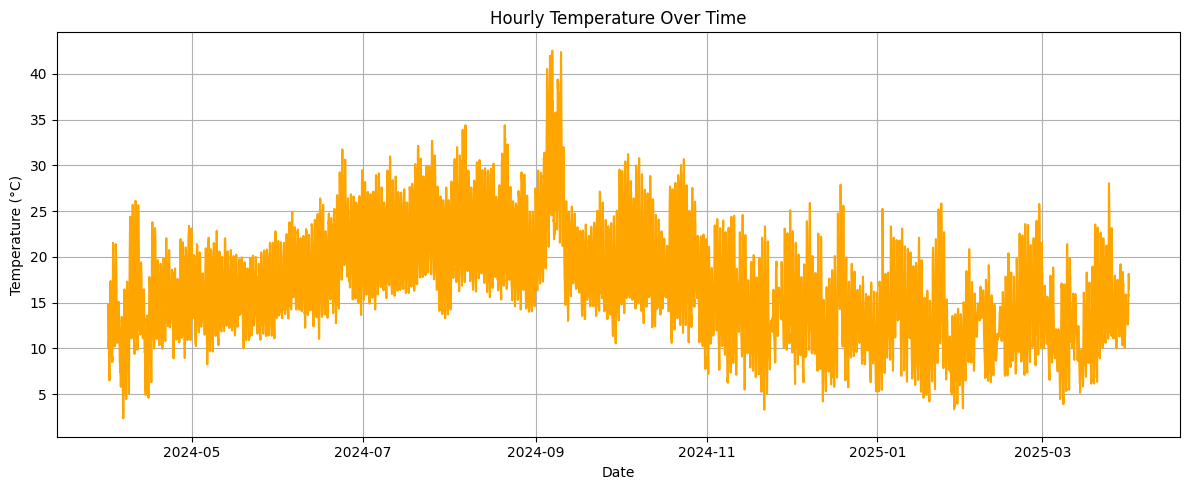

In [8]:
plt.figure(figsize=(12, 5))
plt.plot(weather_aqi['converted_date'], weather_aqi['temperature_2m'], label='Temperature (°C)', color='orange')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Hourly Temperature Over Time')
plt.grid(True)
plt.tight_layout()

In [9]:
weather_aqi.set_index('converted_date', inplace=True)

In [10]:
daily_avg = weather_aqi['temperature_2m'].resample('D').mean()
daily_pm25 = weather_aqi['pm2_5'].resample('D').mean()
daily_humidity = weather_aqi['relative_humidity_2m'].resample('D').mean()

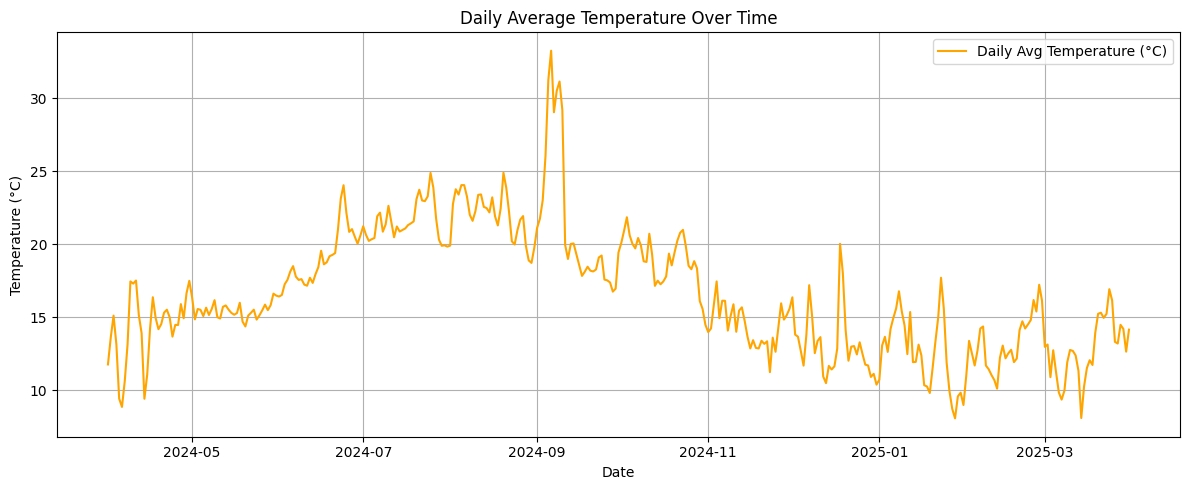

In [11]:
plt.figure(figsize=(12, 5))
plt.plot(daily_avg.index, daily_avg.values, label='Daily Avg Temperature (°C)', color='orange')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Daily Average Temperature Over Time')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

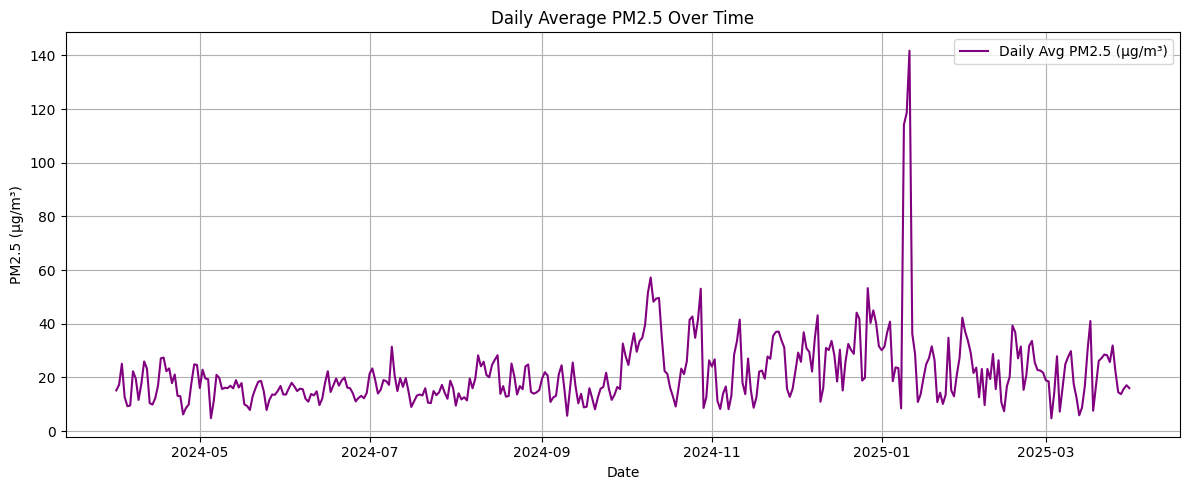

In [12]:
plt.figure(figsize=(12, 5))
plt.plot(daily_pm25.index, daily_pm25.values, label='Daily Avg PM2.5 (µg/m³)', color='purple')
plt.xlabel('Date')
plt.ylabel('PM2.5 (µg/m³)')
plt.title('Daily Average PM2.5 Over Time')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

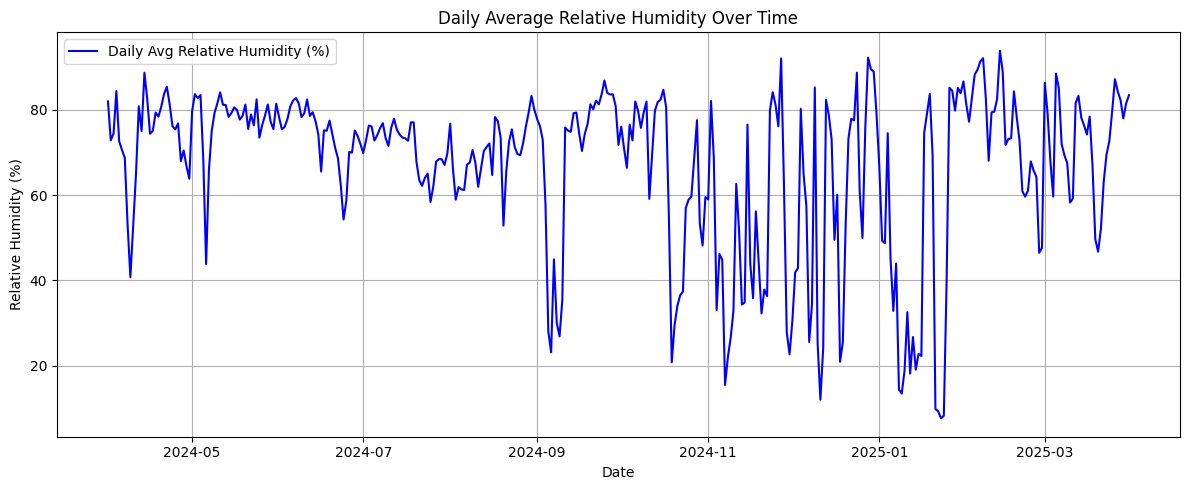

In [13]:
plt.figure(figsize=(12, 5))
plt.plot(daily_humidity.index, daily_humidity.values, label='Daily Avg Relative Humidity (%)', color='blue')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.title('Daily Average Relative Humidity Over Time')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
daily_precip = weather_aqi['precipitation'].resample('D').sum()
precip_counts = (daily_precip > 0).value_counts()
precip_counts.index = ['No Precipitation', 'With Precipitation']
print(precip_counts)

No Precipitation      310
With Precipitation     55
Name: count, dtype: int64


In [16]:
print(weather_aqi.head(48))

                                                date  temperature_2m  \
converted_date                                                         
2024-04-01 00:00:00+00:00  2024-04-01 00:00:00+00:00       14.844999   
2024-04-01 01:00:00+00:00  2024-04-01 01:00:00+00:00       12.295000   
2024-04-01 02:00:00+00:00  2024-04-01 02:00:00+00:00       11.594999   
2024-04-01 03:00:00+00:00  2024-04-01 03:00:00+00:00       10.945000   
2024-04-01 04:00:00+00:00  2024-04-01 04:00:00+00:00        9.995000   
2024-04-01 05:00:00+00:00  2024-04-01 05:00:00+00:00       10.844999   
2024-04-01 06:00:00+00:00  2024-04-01 06:00:00+00:00       10.445000   
2024-04-01 07:00:00+00:00  2024-04-01 07:00:00+00:00       10.245000   
2024-04-01 08:00:00+00:00  2024-04-01 08:00:00+00:00       10.094999   
2024-04-01 09:00:00+00:00  2024-04-01 09:00:00+00:00        8.545000   
2024-04-01 10:00:00+00:00  2024-04-01 10:00:00+00:00        8.045000   
2024-04-01 11:00:00+00:00  2024-04-01 11:00:00+00:00        7.29